# 데이터 준비

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings(action='ignore')

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# train, test, 원본 데이터 불러오기
train = pd.read_csv("./train.csv")
test = pd.read_csv('./test.csv')
ibm_original = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv")

train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [67]:
ibm_original.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 결측치 확인

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [69]:
ibm_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 피처 요약표 생성 및 의미없는 변수 제거

In [70]:
# 원본 데이터 피처 요약표 생성
def summary_feature_info( df ):

    su_df = pd.DataFrame( train.dtypes, columns=['type'] )
    su_df = su_df.reset_index()
    su_df.rename( columns={'index':'feature_name'}, inplace=True )
    su_df['결측치수'] = train.isnull().sum().values
    su_df['고유값수'] = train.nunique().values
    su_df['예시_0'] = train.loc[0].values
    su_df['예시_1'] = train.loc[1].values
    su_df['예시_2'] = train.loc[2].values

    return su_df

summary_feat_train = summary_feature_info(train)
summary_feat_train

,feature_name,type,결측치수,고유값수,예시_0,예시_1,예시_2
0,id,int64,0,1677,0,1,2
1,Age,int64,0,43,36,35,32
2,BusinessTravel,object,0,3,Travel_Frequently,Travel_Rarely,Travel_Rarely
3,DailyRate,int64,0,625,599,921,718
4,Department,object,0,3,Research & Development,Sales,Sales
5,DistanceFromHome,int64,0,29,24,8,26
6,Education,int64,0,6,3,3,3
7,EducationField,object,0,6,Medical,Other,Marketing
8,EmployeeCount,int64,0,1,1,1,1
9,EnvironmentSatisfaction,int64,0,4,4,1,3


In [71]:
# 고유값이 1 또는 1677인 변수 제거 : id, EmployeeCount, StandardHours, Over18
train = train.drop(['EmployeeCount', 'id', 'StandardHours', 'Over18'], axis=1)
train.shape

(1677, 31)

In [72]:
# train 데이터 피처 요약표 생성
def summary_feature_info( df ):

    su_df = pd.DataFrame( ibm_original.dtypes, columns=['type'] )
    su_df = su_df.reset_index()
    su_df.rename( columns={'index':'feature_name'}, inplace=True )
    su_df['결측치수'] = ibm_original.isnull().sum().values
    su_df['고유값수'] = ibm_original.nunique().values
    su_df['예시_0'] = ibm_original.loc[0].values
    su_df['예시_1'] = ibm_original.loc[1].values
    su_df['예시_2'] = ibm_original.loc[2].values

    return su_df

summary_feat_origin = summary_feature_info(ibm_original )
summary_feat_origin

,feature_name,type,결측치수,고유값수,예시_0,예시_1,예시_2
0,Age,int64,0,43,41,49,37
1,Attrition,object,0,2,Yes,No,Yes
2,BusinessTravel,object,0,3,Travel_Rarely,Travel_Frequently,Travel_Rarely
3,DailyRate,int64,0,886,1102,279,1373
4,Department,object,0,3,Sales,Research & Development,Research & Development
5,DistanceFromHome,int64,0,29,1,8,2
6,Education,int64,0,5,2,1,2
7,EducationField,object,0,6,Life Sciences,Life Sciences,Other
8,EmployeeCount,int64,0,1,1,1,1
9,EmployeeNumber,int64,0,1470,1,2,4


In [73]:
# 고유값이 1 또는 1470인 변수 제거 : EmployeeCount, EmployeeNumber, StandardHours, Over18
ibm_original = ibm_original.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
ibm_original.shape

(1470, 31)

In [74]:
ibm_original.shape, train.shape

((1470, 31), (1677, 31))

In [78]:
# 데이터 통합 전 종속변수 인코딩
ibm_original.Attrition = ibm_original.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)
ibm_original.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# train과 원본 데이터 통합

In [80]:
df = pd.concat([train, ibm_original])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,...,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,...,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,...,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,...,3,0,31,0,3,31,14,4,10,1


## 데이터 시각화


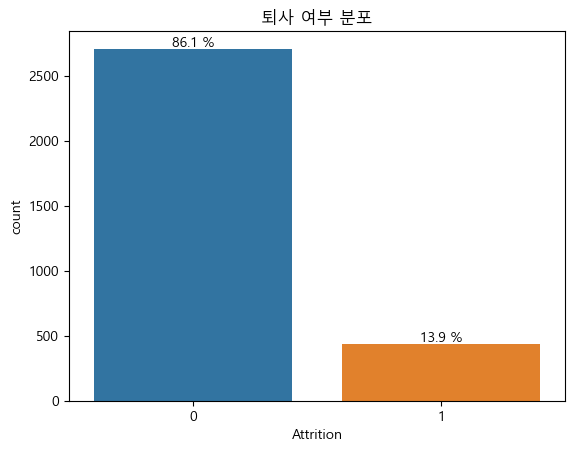

In [84]:
def draw_text_by_ax( ax, df ):
    percents = list()
    for patch in ax.patches:
        rate = patch.get_height() / df.shape[0] * 100
        ax.text(x=patch.get_x() + patch.get_width()/2,
                y=patch.get_y() + patch.get_height() + df.shape[0]*0.005,
                s=f'{rate:1.1f} %',
                ha='center')
        percents.append( rate )
    return ax, percents

draw_text_by_ax( sns.countplot( data=df, x='Attrition' ), df )
plt.title('퇴사 여부 분포')
plt.show()

# 퇴사 안 한 사람의 비율이 압도적으로 높음

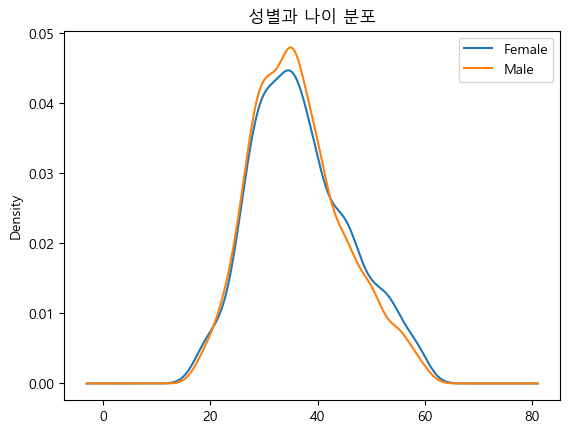

In [83]:
df.groupby('Gender').Age.plot(kind='kde')
plt.title("성별과 나이 분포")
plt.legend()
plt.show()

# 남녀 둘 다 30대에 많이 분포되어 있음

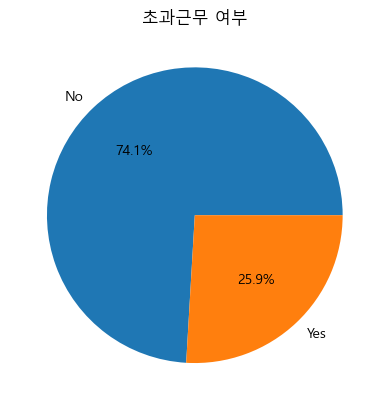

In [86]:
df.groupby('OverTime').size().plot(kind='pie', autopct ='%1.1f%%' )
plt.title("초과근무 여부")
plt.show()

# 초과근무 비율이 약 75:25

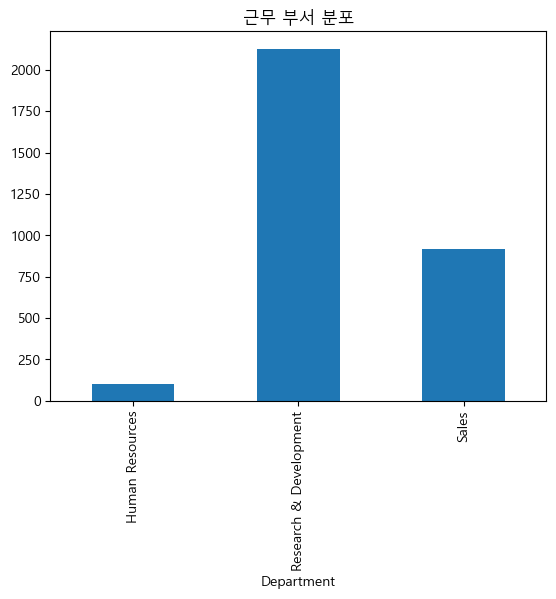

In [93]:
df.groupby('Department').size().plot(kind='bar')
plt.title ("근무 부서 분포")
plt.show()

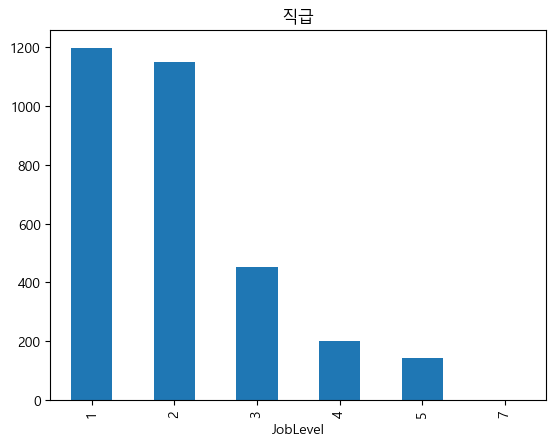

In [96]:
df.groupby('JobLevel').size().plot(kind='bar')
plt.title("직급")
plt.show()

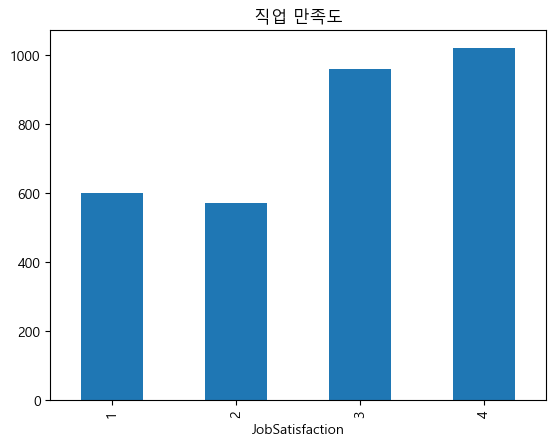

In [99]:
df.groupby('JobSatisfaction').size().plot(kind='bar')
plt.title("직업 만족도")
plt.show()

Text(0.5, 1.0, '근무한 회사 수')

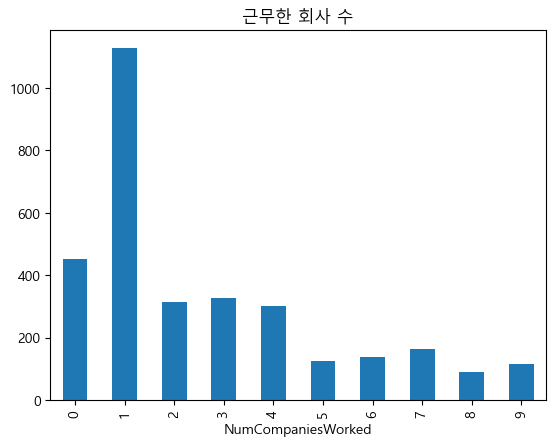

In [100]:
df.groupby('NumCompaniesWorked').size().plot(kind='bar')
plt.title ("근무한 회사 수")

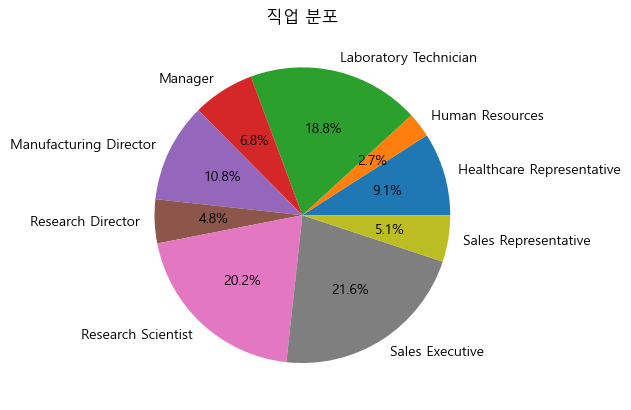

In [103]:
df.groupby('JobRole').size().plot(kind='pie', autopct ='%1.1f%%' )
plt.title("직업 분포")
plt.show()

In [105]:
def make_cross_tabul( df, feature, t_nm):
    cross_tab = pd.crosstab(df[feature], df[t_nm], normalize='index') * 100
    cross_tab.reset_index(inplace = True)
    return cross_tab

cross_tab = make_cross_tabul(df, 'Department', 'Attrition')
cross_tab

Attrition,Department,0,1
0,Human Resources,81.372549,18.627451
1,Research & Development,87.828947,12.171053
2,Sales,82.660851,17.339149


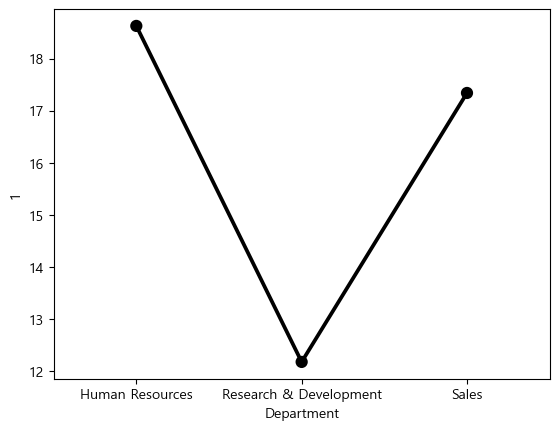

In [114]:
def show_pointplot( x_nm, y_nm, data, color='black', ax=None ):
    sns.pointplot( x=x_nm,       # 데이터에 피처값 -> 고유값
                   y=y_nm,       # 정답 0에 대한 컬럼명 -> 비중
                   data=data,    # 전체 데이터(교차분석표데이터)
                   order=data[x_nm], # x값이 배치되는 순서 Blue-Green-Red
                   color=color,  # 색상
                   ax=ax         # if ax else None
    );

show_pointplot('Department', 1, cross_tab )

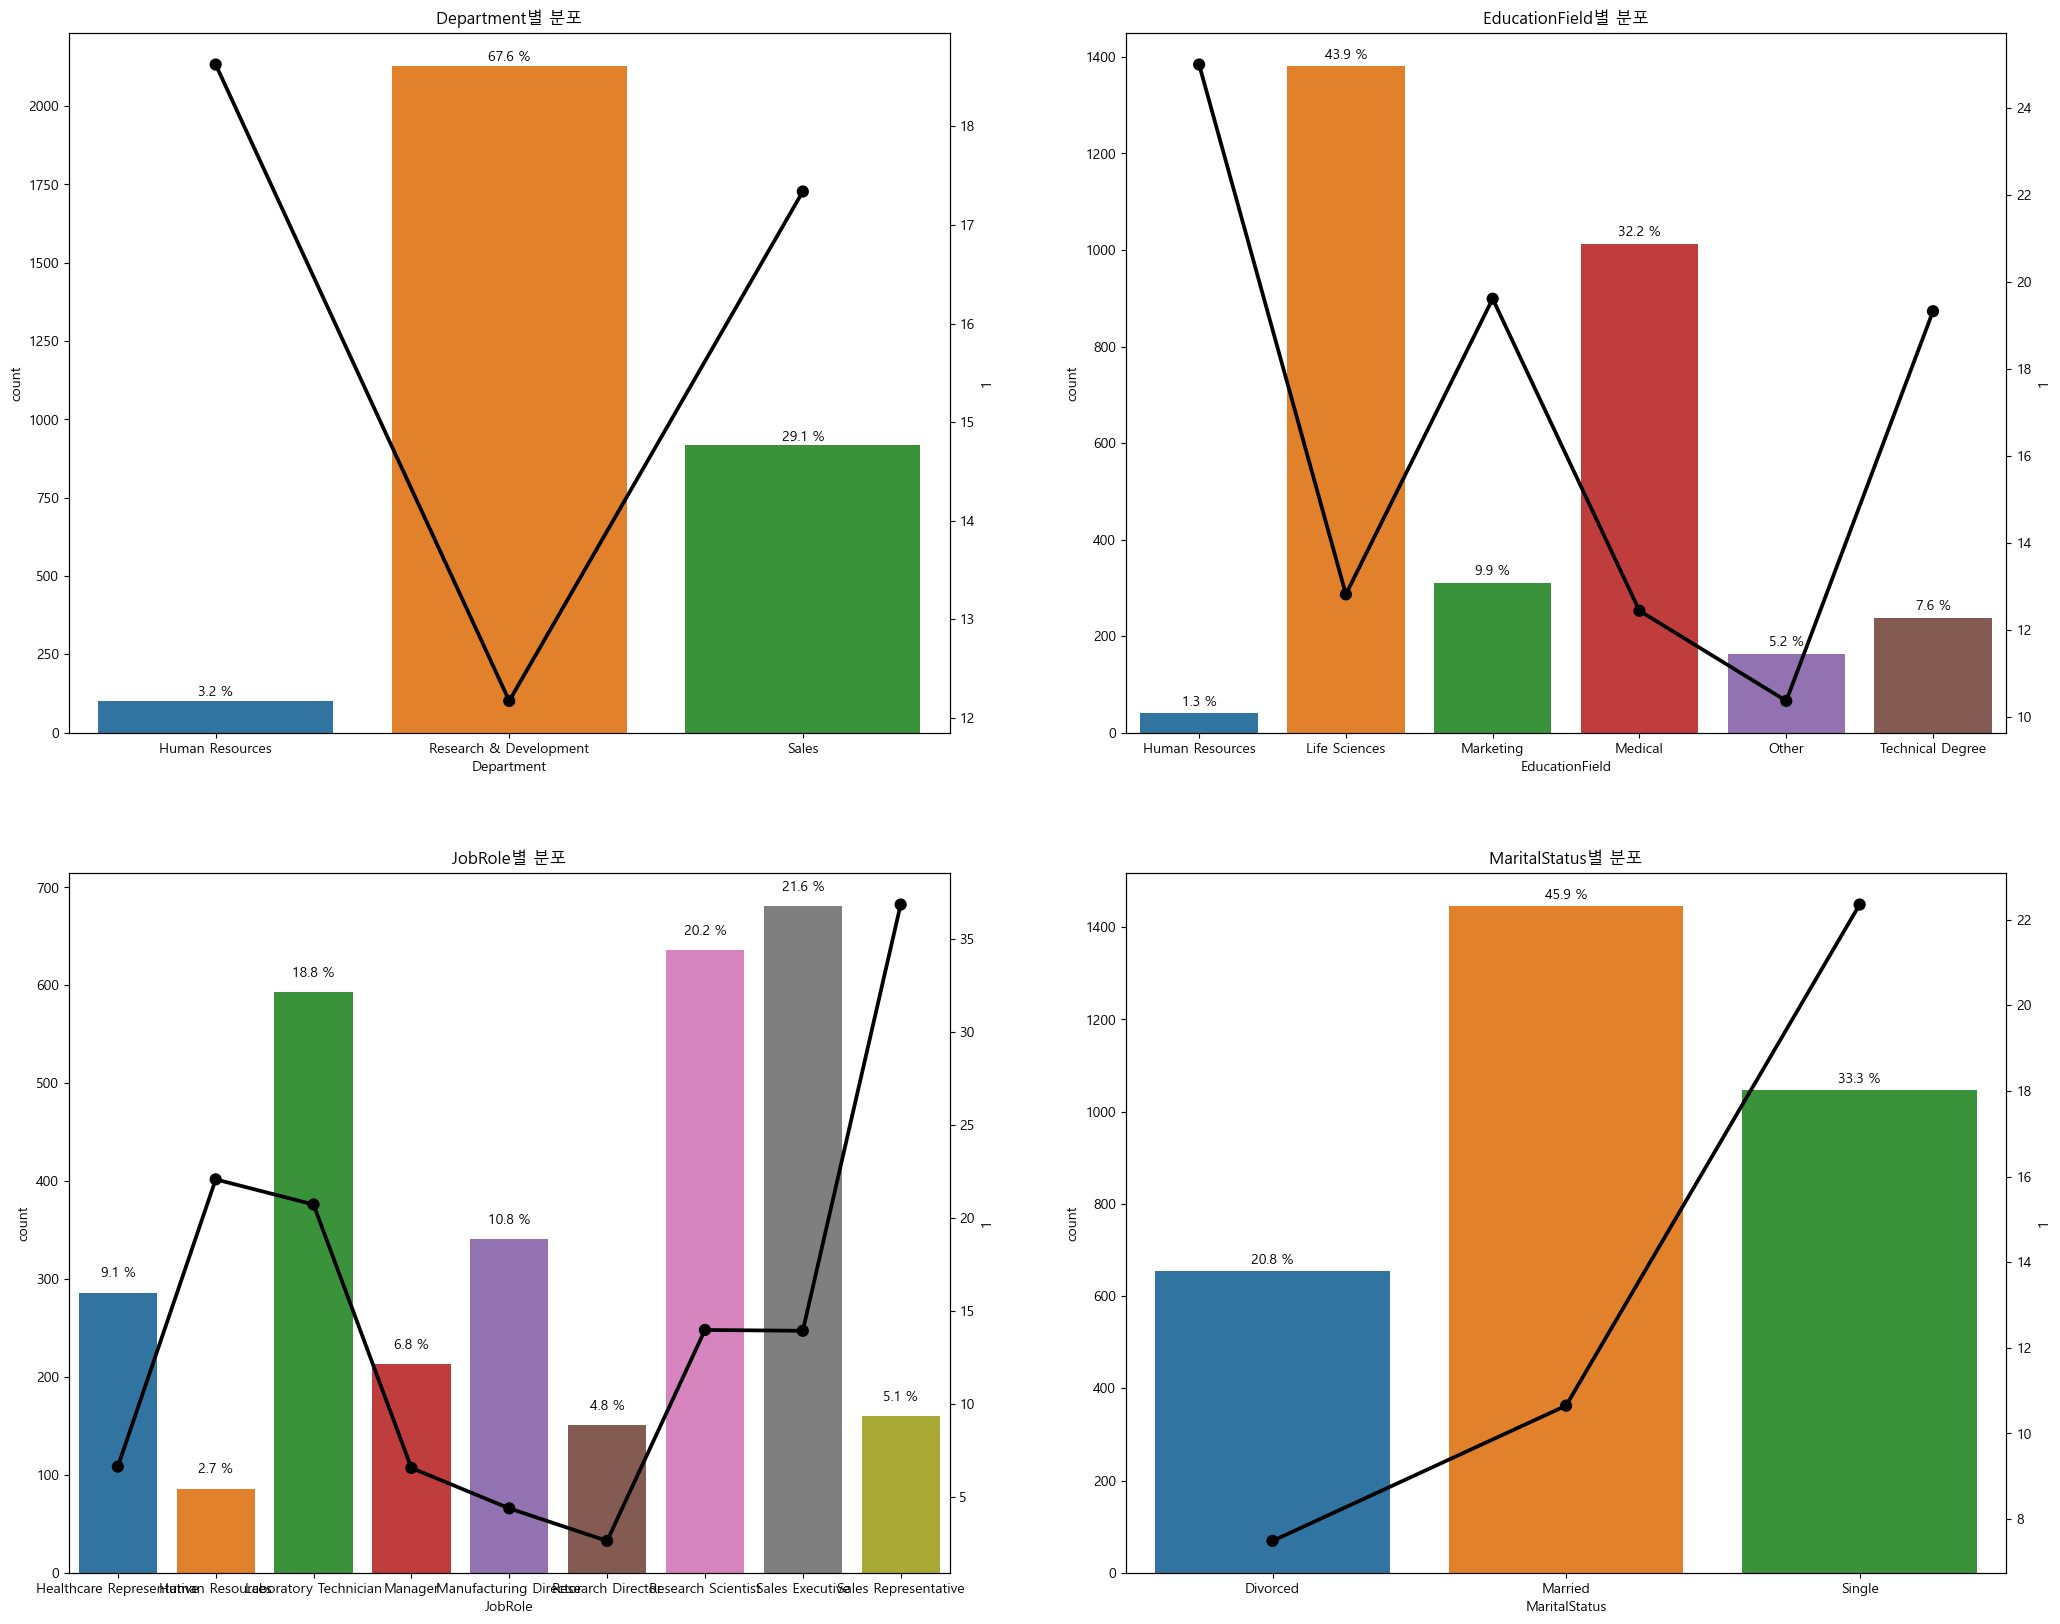

In [111]:
import matplotlib.gridspec as gs

nom_features = [ 'Department','EducationField', 'JobRole','MaritalStatus']
COLS         = 2
ROWS         = sum(divmod( len(nom_features),  COLS))

def show_count_point_plot( df, features, t_nm, rows, cols):
    plt.figure( figsize=(25, 20) )
    gs_grid = gs.GridSpec(rows, cols)

    for idx, feature in enumerate(features):

        ax = plt.subplot( gs_grid[idx] )
        cross_tab = make_cross_tabul(df, feature, t_nm )
        draw_text_by_ax( sns.countplot( data=df, x=feature, ax=ax, order=cross_tab[feature] ), df )
        show_pointplot( feature, 1, cross_tab, ax=ax.twinx() )

        ax.set_title(f'{feature}별 분포')
    plt.show()
    pass

show_count_point_plot( df, nom_features, 'Attrition', ROWS, COLS )

# 피처와 고유값별 퇴사한 사람이 차지하는 비율이 모두 다르므로 예측 능력이 있음(학습에 도움이 됨)

## 이상치 확인 - noise

### 오류사항 체크

In [115]:
# 나이 < 근무 기간
age_error = df[df['Age'] < df['TotalWorkingYears']]
age_error

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
877,39,Travel_Rarely,682,Research & Development,1,4,Other,4,Male,57,...,4,1,41,0,3,41,8,12,10,0


In [116]:
# 나이별 가능한 실제 근무기간 (18세 미만부터 근무)
age_real_error = df[df['Age']-18 < df['TotalWorkingYears']]
age_real_error

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
9,25,Travel_Rarely,806,Research & Development,9,1,Medical,3,Female,82,...,3,1,9,2,2,9,7,7,8,0
79,35,Travel_Frequently,1396,Research & Development,11,1,Life Sciences,1,Female,37,...,3,0,33,3,3,33,10,13,8,1
103,23,Travel_Frequently,857,Research & Development,1,1,Life Sciences,1,Male,61,...,4,2,8,2,2,8,7,3,7,0
110,33,Travel_Rarely,1450,Sales,12,3,Life Sciences,1,Female,92,...,1,0,16,2,1,0,0,0,0,1
115,27,Travel_Rarely,882,Research & Development,17,3,Medical,2,Male,87,...,4,1,14,0,3,13,9,4,9,0
138,38,Travel_Rarely,1288,Research & Development,2,4,Medical,3,Male,76,...,3,2,30,2,3,3,2,0,2,0
172,20,Travel_Rarely,1308,Research & Development,1,3,Medical,4,Female,87,...,2,0,5,3,4,5,2,2,3,1
268,31,Travel_Rarely,523,Sales,3,5,Life Sciences,2,Male,54,...,3,0,28,4,3,20,7,3,7,1
311,19,Travel_Rarely,741,Sales,29,3,Life Sciences,3,Female,88,...,4,0,11,3,1,6,0,1,5,0
330,30,Travel_Rarely,1411,Human Resources,4,3,Human Resources,3,Male,43,...,2,1,15,4,3,14,8,5,8,0


In [117]:
# 총 일한 기간 < 해당 회사 일한 기간
working_yr_error = df[df["TotalWorkingYears"] < df["YearsAtCompany"]]
working_yr_error

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
786,39,Travel_Rarely,1369,Human Resources,8,3,Medical,4,Male,61,...,1,1,18,2,3,19,8,3,8,0
1500,53,Travel_Rarely,1411,Research & Development,1,4,Life Sciences,3,Female,81,...,4,1,29,2,2,30,9,11,13,0


In [118]:
# 총 일한 기간 < 해당 직무 일한 기간
role_yr_error  = df[ df["TotalWorkingYears"] < df["YearsInCurrentRole"]]
role_yr_error

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
692,25,Travel_Rarely,1117,Research & Development,1,2,Medical,4,Male,95,...,4,0,6,2,2,6,7,1,5,0


### 학력사항 체크

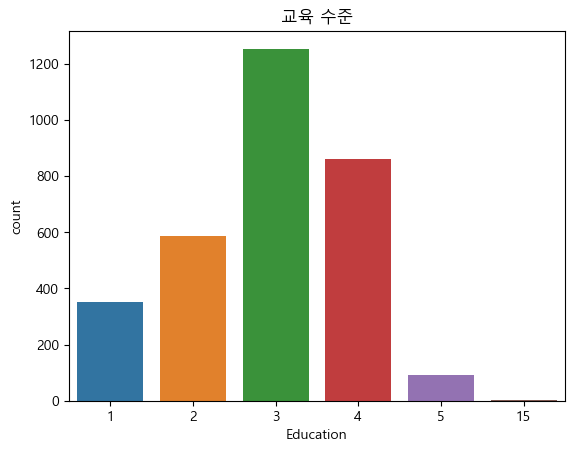

In [120]:
sns.countplot(data=df, x='Education')
plt.title('교육 수준')
plt.show()

In [121]:
df[df['Education'] == 15]

# 교육수준이 정상 범주를 벗어난 사람(Education == 15) 1명 존재

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
527,38,Travel_Rarely,548,Research & Development,1,15,Life Sciences,1,Female,72,...,1,1,7,2,3,5,2,1,4,0


### 직업능력평가사항 체크

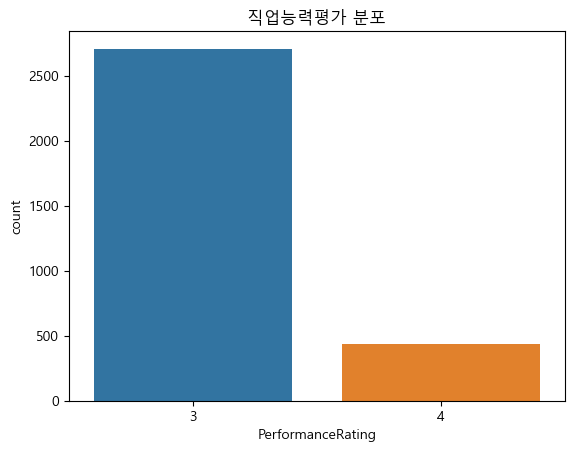

In [128]:
sns.countplot(data=df, x='PerformanceRating')
plt.title('직업능력평가 분포')
plt.show()

# 분포가 1 ~ 4인데, 1과 2는 없고 3부터 시작

### 직급별 월급 체크

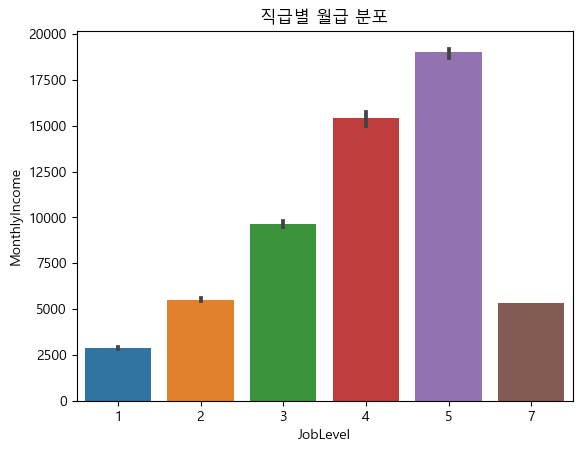

In [129]:
sns.barplot(x='JobLevel', y='MonthlyIncome', data=df)
plt.title('직급별 월급 분포')
plt.show()

# 직급이 올라갈수록 월급도 상승함
# 하지만 직급 7의 경우는 예외 => 이상치 가능성 존재

In [130]:
df[df.JobLevel == 7]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1535,30,Travel_Rarely,583,Research & Development,6,3,Life Sciences,4,Female,100,...,4,0,12,1,2,8,7,1,5,0


## 피처별 퇴사 여부 시각화

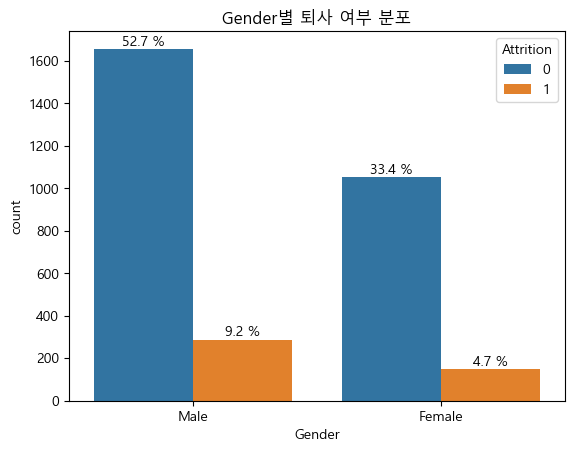

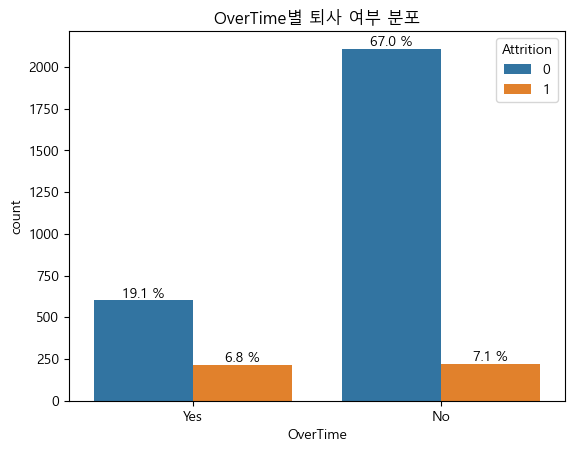

In [90]:
bin_features = ['Gender', 'OverTime']
bin_logs     = dict()
for feat in bin_features:
    ax, percents = draw_text_by_ax( sns.countplot( data=df, x=feat, hue='Attrition'), df)
    bin_logs[feat] = percents
    ax.set_title(f'{feat}별 퇴사 여부 분포')
    plt.show()

# 남녀 둘 다 퇴사 여부에 따라 분포가 거의 동일하므로, 성별이 퇴사에 영향을 미치지 않음
# 초과근무 한 사람 중에 퇴사한 사람의 비율이 안 한 사람보다 비율이 크므로, 초과근무 여부가 퇴사에 영향을 미칠 것으로 예상

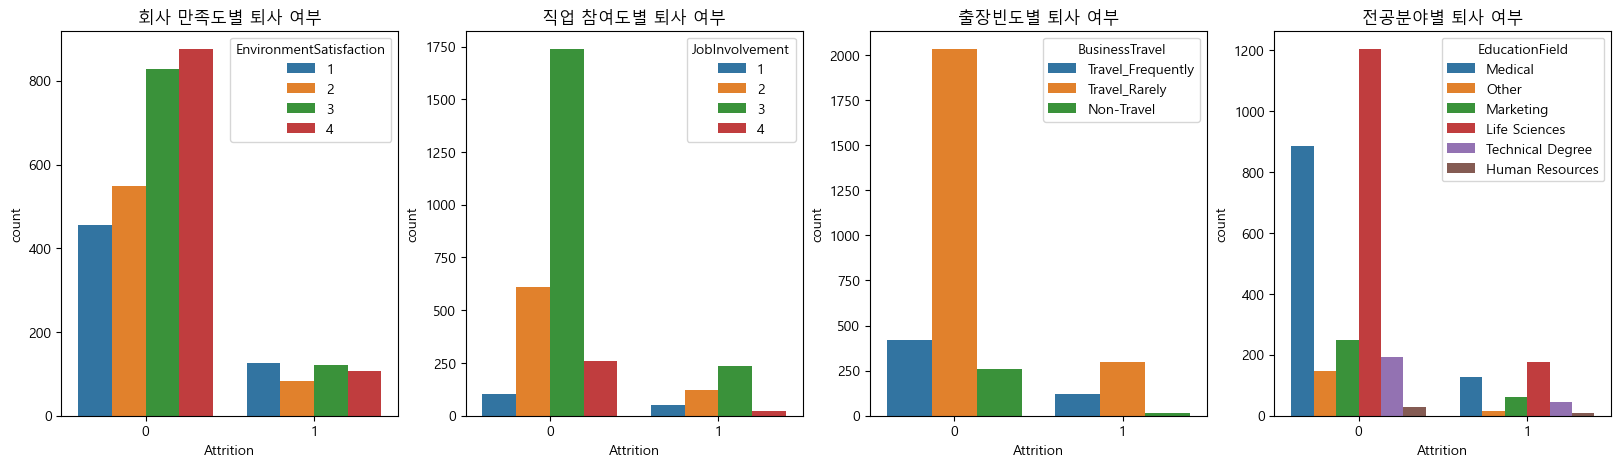

In [131]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))

sns.countplot(x='Attrition', hue = "EnvironmentSatisfaction", data= df, ax=ax[0])
ax[0].set_title("회사 만족도별 퇴사 여부")

sns.countplot(x='Attrition', hue = "JobInvolvement", data= df, ax=ax[1])
ax[1].set_title("직업 참여도별 퇴사 여부")

sns.countplot(x='Attrition', hue = "BusinessTravel", data= df, ax=ax[2])
ax[2].set_title("출장빈도별 퇴사 여부")

sns.countplot(x='Attrition', hue = "EducationField", data= df, ax=ax[3])
ax[3].set_title("전공분야별 퇴사 여부")

plt.show()

# 퇴사한 사람 중 회사 만족도가 낮은 사람의 분포가 많음. 회사 만족도가 퇴사에 영향 미칠 것으로 예상
# 퇴사 여부에 따라 직업 참여도와 출장빈도, 전공분야의 분포가 거의 동일하므로, 각 요인들은 퇴사에 유의미한 영향을 미치진 않음

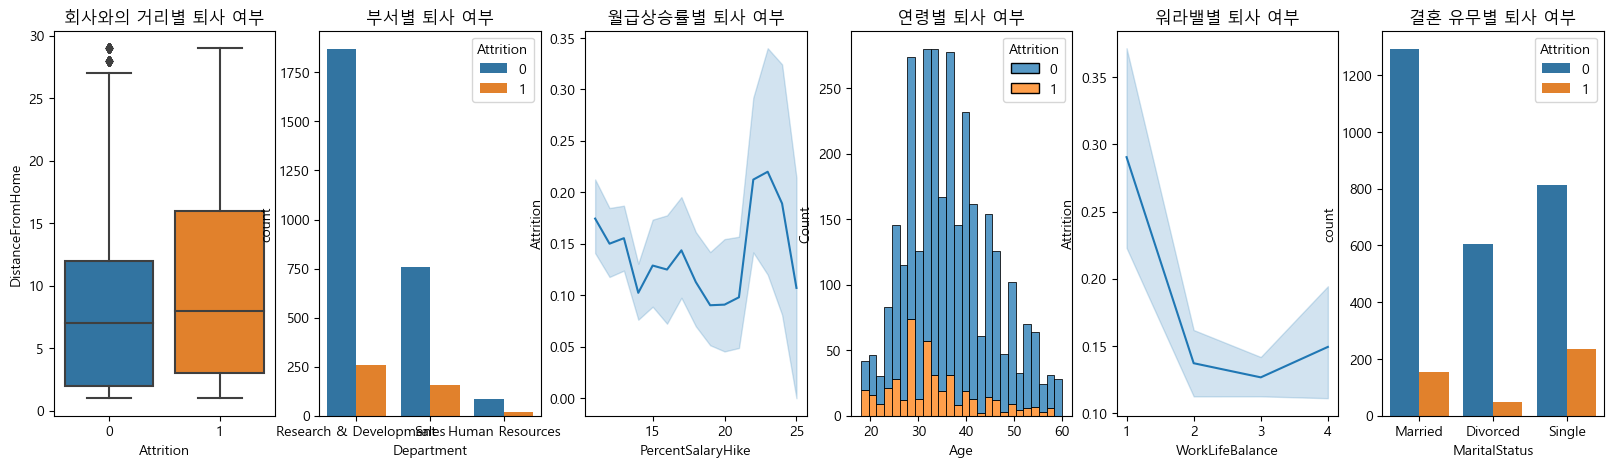

In [133]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))

sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, ax=ax[0])
ax[0].set_title("회사와의 거리별 퇴사 여부")

sns.countplot(x='Department', hue='Attrition', data=df, ax=ax[1])
ax[1].set_title("부서별 퇴사 여부")

sns.lineplot(x='PercentSalaryHike', y = "Attrition", data= df, ax=ax[2])
ax[2].set_title("월급상승률별 퇴사 여부")

sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', ax=ax[3])
ax[3].set_title("연령별 퇴사 여부")

sns.lineplot(x='WorkLifeBalance', y='Attrition', data=df, ax=ax[4])
ax[4].set_title("워라밸별 퇴사 여부")

sns.countplot(x='MaritalStatus', hue = "Attrition", data=df, ax=ax[5])
ax[5].set_title("결혼 유무별 퇴사 여부")

plt.show()

# 회사와의 거리가 멀수록 퇴사 많이함
# 부서가 차지하는 비중은 R & D, Sales, Human Recources 순으로 많고, 퇴사 비율은 Sales와 HR이 R & D에 비해 높은 것으로 확인
# 월급상승률 중반 이후에 퇴사 비율이 상승하지만, 후반에 다시 퇴사 비율 감소
# 20대 후반 ~ 30대 초반이 퇴사를 많이함
# 워라밸이 보장될수록 퇴사 비율이 낮아짐
# 결혼한 사람보다 싱글인 사람의 퇴사 비율이 높은 것으로 보아 결혼 유무가 퇴사에 영향을 미칠 것으로 예상